In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from time import time

SKIP_TUNING=True

# Dataset loading
dataset = pd.read_csv(r"./NKI_bin_event.csv", sep=',')

dataset = dataset.drop("Patient", axis=1)
dataset = dataset.drop("survival", axis=1)
dataset = dataset.drop("survival_quartiles", axis=1)
dataset = dataset.drop("survival_binary", axis=1)
dataset = dataset.drop("eventdeath", axis=1)
dataset = dataset.drop("ID", axis=1)
dataset = dataset.drop("barcode", axis=1)
dataset = dataset.drop("timerecurrence", axis=1)
dataset = dataset.drop("Unnamed: 0", axis=1)

train_idx = np.random.rand(len(dataset)) < 0.8
train_set = dataset[train_idx]
test_set  = dataset[~train_idx]

train_y = train_set.loc[:, "surv_quartile_event"]
new_train_y=train_set.loc[:, "surv_quartile_event"]
train_x = train_set.drop("surv_quartile_event", axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
train_x= min_max_scaler.fit_transform(train_x)
#print(train_y.shape)
train_y = np.reshape(train_y.to_numpy(), (-1, 1))
train_y= min_max_scaler.fit_transform(train_y)


test_y = test_set.loc[:, "surv_quartile_event"]
new_test_y = test_set.loc[:, "surv_quartile_event"]
test_x = test_set.drop("surv_quartile_event", axis=1)
test_x= min_max_scaler.fit_transform(test_x)
test_y = np.reshape(test_y.to_numpy(), (-1, 1))
test_y= min_max_scaler.fit_transform(test_y)

In [2]:
#Load libraries
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
#Show the number of missing (NAN, NaN, na) data for each column
dataset.isnull().sum()

age                    0
surv_binary_event      0
surv_quartile_event    0
chemo                  0
hormonal               0
amputation             0
histtype               0
diam                   0
posnodes               0
grade                  0
angioinv               0
lymphinfil             0
esr1                   0
G3PDH_570              0
Contig45645_RC         0
Contig44916_RC         0
D25272                 0
J00129                 0
Contig29982_RC         0
Contig56678_RC         0
Contig53047_RC         0
Contig19551            0
Contig47230_RC         0
Contig46501_RC         0
Contig20749_RC         0
AL157500               0
AL157502               0
Contig37376_RC         0
Contig45395_RC         0
X98307                 0
                      ..
NM_002274              0
NM_001546              0
NM_002275              0
NM_002276              0
NM_001548              0
Contig51486_RC         0
NM_000824              0
NM_001554              0
NM_000826              0


In [5]:
dataset.shape

(272, 1566)

In [6]:
model = Sequential([
    Dense(12, activation='relu', input_shape=( 1565 ,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
hist = model.fit(train_x, train_y,
          batch_size=57, epochs=1000,  validation_split=0.2)


Train on 176 samples, validate on 45 samples
Epoch 1/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.6796 - accuracy: 0.2557 - val_loss: 0.6721 - val_accuracy: 0.2222
Epoch 2/1000
176/176 [==============================] - 0s 159us/step - loss: 0.6334 - accuracy: 0.2841 - val_loss: 0.6712 - val_accuracy: 0.2222
Epoch 3/1000
176/176 [==============================] - 0s 153us/step - loss: 0.6205 - accuracy: 0.2841 - val_loss: 0.6762 - val_accuracy: 0.2222
Epoch 4/1000
176/176 [==============================] - 0s 153us/step - loss: 0.6152 - accuracy: 0.2841 - val_loss: 0.6793 - val_accuracy: 0.2222
Epoch 5/1000
176/176 [==============================] - 0s 153us/step - loss: 0.6135 - accuracy: 0.2841 - val_loss: 0.6833 - val_accuracy: 0.2222
Epoch 6/1000
176/176 [==============================] - 0s 153us/step - loss: 0.6127 - accuracy: 0.2841 - val_loss: 0.6861 - val_accuracy: 0.2222
Epoch 7/1000
176/176 [==============================] - 0s 153us/step - loss: 0.

Epoch 111/1000
176/176 [==============================] - 0s 113us/step - loss: 0.5144 - accuracy: 0.3636 - val_loss: 0.6143 - val_accuracy: 0.2889
Epoch 112/1000
176/176 [==============================] - 0s 136us/step - loss: 0.5141 - accuracy: 0.3693 - val_loss: 0.6021 - val_accuracy: 0.3111
Epoch 113/1000
176/176 [==============================] - 0s 119us/step - loss: 0.5193 - accuracy: 0.3864 - val_loss: 0.6470 - val_accuracy: 0.2667
Epoch 114/1000
176/176 [==============================] - 0s 119us/step - loss: 0.5141 - accuracy: 0.3466 - val_loss: 0.6334 - val_accuracy: 0.2667
Epoch 115/1000
176/176 [==============================] - 0s 119us/step - loss: 0.5132 - accuracy: 0.3636 - val_loss: 0.6323 - val_accuracy: 0.2667
Epoch 116/1000
176/176 [==============================] - 0s 125us/step - loss: 0.5117 - accuracy: 0.3636 - val_loss: 0.6168 - val_accuracy: 0.2889
Epoch 117/1000
176/176 [==============================] - 0s 119us/step - loss: 0.5114 - accuracy: 0.3693 - val_

176/176 [==============================] - 0s 130us/step - loss: 0.4425 - accuracy: 0.4091 - val_loss: 0.5575 - val_accuracy: 0.3333
Epoch 222/1000
176/176 [==============================] - 0s 125us/step - loss: 0.4144 - accuracy: 0.4205 - val_loss: 0.6084 - val_accuracy: 0.3111
Epoch 223/1000
176/176 [==============================] - 0s 113us/step - loss: 0.4126 - accuracy: 0.4261 - val_loss: 0.5514 - val_accuracy: 0.3556
Epoch 224/1000
176/176 [==============================] - 0s 125us/step - loss: 0.4392 - accuracy: 0.4034 - val_loss: 0.5373 - val_accuracy: 0.3556
Epoch 225/1000
176/176 [==============================] - 0s 136us/step - loss: 0.4292 - accuracy: 0.4148 - val_loss: 0.5578 - val_accuracy: 0.3556
Epoch 226/1000
176/176 [==============================] - 0s 119us/step - loss: 0.4566 - accuracy: 0.3920 - val_loss: 0.5339 - val_accuracy: 0.3556
Epoch 227/1000
176/176 [==============================] - 0s 136us/step - loss: 0.4094 - accuracy: 0.4261 - val_loss: 0.7838 - 

176/176 [==============================] - 0s 125us/step - loss: 0.3661 - accuracy: 0.4261 - val_loss: 0.5491 - val_accuracy: 0.3778
Epoch 332/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3602 - accuracy: 0.4261 - val_loss: 0.7769 - val_accuracy: 0.2667
Epoch 333/1000
176/176 [==============================] - 0s 108us/step - loss: 0.3985 - accuracy: 0.4205 - val_loss: 0.5314 - val_accuracy: 0.3778
Epoch 334/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3538 - accuracy: 0.4261 - val_loss: 0.5923 - val_accuracy: 0.3333
Epoch 335/1000
176/176 [==============================] - 0s 130us/step - loss: 0.3579 - accuracy: 0.4261 - val_loss: 0.6942 - val_accuracy: 0.2889
Epoch 336/1000
176/176 [==============================] - 0s 130us/step - loss: 0.3783 - accuracy: 0.4261 - val_loss: 0.5798 - val_accuracy: 0.3333
Epoch 337/1000
176/176 [==============================] - 0s 142us/step - loss: 0.3606 - accuracy: 0.4261 - val_loss: 0.4824 - 

176/176 [==============================] - 0s 113us/step - loss: 0.3438 - accuracy: 0.4261 - val_loss: 0.5107 - val_accuracy: 0.3778
Epoch 442/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3360 - accuracy: 0.4261 - val_loss: 0.6298 - val_accuracy: 0.2889
Epoch 443/1000
176/176 [==============================] - 0s 136us/step - loss: 0.4112 - accuracy: 0.4261 - val_loss: 0.5498 - val_accuracy: 0.3778
Epoch 444/1000
176/176 [==============================] - 0s 125us/step - loss: 0.3397 - accuracy: 0.4261 - val_loss: 0.4921 - val_accuracy: 0.3778
Epoch 445/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3315 - accuracy: 0.4261 - val_loss: 0.4581 - val_accuracy: 0.3778
Epoch 446/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3503 - accuracy: 0.4261 - val_loss: 0.4788 - val_accuracy: 0.4000
Epoch 447/1000
176/176 [==============================] - 0s 125us/step - loss: 0.4091 - accuracy: 0.4205 - val_loss: 0.4586 - 

176/176 [==============================] - 0s 142us/step - loss: 0.3369 - accuracy: 0.4261 - val_loss: 0.4418 - val_accuracy: 0.4000
Epoch 552/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3526 - accuracy: 0.4261 - val_loss: 0.4634 - val_accuracy: 0.3778
Epoch 553/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3244 - accuracy: 0.4261 - val_loss: 0.4744 - val_accuracy: 0.3778
Epoch 554/1000
176/176 [==============================] - 0s 121us/step - loss: 0.3252 - accuracy: 0.4261 - val_loss: 0.5359 - val_accuracy: 0.3778
Epoch 555/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3360 - accuracy: 0.4261 - val_loss: 0.4686 - val_accuracy: 0.3778
Epoch 556/1000
176/176 [==============================] - 0s 136us/step - loss: 0.3282 - accuracy: 0.4261 - val_loss: 0.4430 - val_accuracy: 0.3778
Epoch 557/1000
176/176 [==============================] - 0s 142us/step - loss: 0.3232 - accuracy: 0.4261 - val_loss: 0.4624 - 

176/176 [==============================] - 0s 119us/step - loss: 0.3219 - accuracy: 0.4261 - val_loss: 0.4438 - val_accuracy: 0.4000
Epoch 662/1000
176/176 [==============================] - 0s 108us/step - loss: 0.3551 - accuracy: 0.4261 - val_loss: 0.5114 - val_accuracy: 0.3778
Epoch 663/1000
176/176 [==============================] - 0s 119us/step - loss: 0.4654 - accuracy: 0.4261 - val_loss: 0.4418 - val_accuracy: 0.4000
Epoch 664/1000
176/176 [==============================] - 0s 119us/step - loss: 0.3287 - accuracy: 0.4261 - val_loss: 0.5811 - val_accuracy: 0.3556
Epoch 665/1000
176/176 [==============================] - 0s 130us/step - loss: 0.5076 - accuracy: 0.4034 - val_loss: 0.4433 - val_accuracy: 0.4000
Epoch 666/1000
176/176 [==============================] - 0s 125us/step - loss: 0.3333 - accuracy: 0.4261 - val_loss: 0.4564 - val_accuracy: 0.4000
Epoch 667/1000
176/176 [==============================] - 0s 136us/step - loss: 0.3618 - accuracy: 0.4261 - val_loss: 0.4570 - 

176/176 [==============================] - 0s 153us/step - loss: 0.3225 - accuracy: 0.4261 - val_loss: 0.5704 - val_accuracy: 0.3556
Epoch 772/1000
176/176 [==============================] - 0s 153us/step - loss: 0.3296 - accuracy: 0.4261 - val_loss: 0.4965 - val_accuracy: 0.3778
Epoch 773/1000
176/176 [==============================] - 0s 136us/step - loss: 0.3246 - accuracy: 0.4261 - val_loss: 0.5580 - val_accuracy: 0.3556
Epoch 774/1000
176/176 [==============================] - 0s 142us/step - loss: 0.3263 - accuracy: 0.4261 - val_loss: 0.5113 - val_accuracy: 0.3778
Epoch 775/1000
176/176 [==============================] - 0s 136us/step - loss: 0.3223 - accuracy: 0.4261 - val_loss: 0.4832 - val_accuracy: 0.3778
Epoch 776/1000
176/176 [==============================] - 0s 130us/step - loss: 0.3149 - accuracy: 0.4261 - val_loss: 0.4722 - val_accuracy: 0.3778
Epoch 777/1000
176/176 [==============================] - 0s 125us/step - loss: 0.3140 - accuracy: 0.4261 - val_loss: 0.5220 - 

176/176 [==============================] - 0s 215us/step - loss: 0.3349 - accuracy: 0.4261 - val_loss: 0.5745 - val_accuracy: 0.3556
Epoch 882/1000
176/176 [==============================] - 0s 195us/step - loss: 0.3272 - accuracy: 0.4261 - val_loss: 0.5005 - val_accuracy: 0.3778
Epoch 883/1000
176/176 [==============================] - 0s 173us/step - loss: 0.3160 - accuracy: 0.4261 - val_loss: 0.5419 - val_accuracy: 0.3556
Epoch 884/1000
176/176 [==============================] - 0s 167us/step - loss: 0.3253 - accuracy: 0.4261 - val_loss: 0.5482 - val_accuracy: 0.3556
Epoch 885/1000
176/176 [==============================] - 0s 142us/step - loss: 0.3277 - accuracy: 0.4261 - val_loss: 0.7154 - val_accuracy: 0.3111
Epoch 886/1000
176/176 [==============================] - 0s 125us/step - loss: 0.4176 - accuracy: 0.4261 - val_loss: 0.8971 - val_accuracy: 0.2667
Epoch 887/1000
176/176 [==============================] - 0s 125us/step - loss: 0.3956 - accuracy: 0.4261 - val_loss: 0.5303 - 

176/176 [==============================] - 0s 147us/step - loss: 0.3098 - accuracy: 0.4261 - val_loss: 0.5333 - val_accuracy: 0.3556
Epoch 992/1000
176/176 [==============================] - 0s 130us/step - loss: 0.3162 - accuracy: 0.4261 - val_loss: 0.5099 - val_accuracy: 0.3778
Epoch 993/1000
176/176 [==============================] - 0s 125us/step - loss: 0.3183 - accuracy: 0.4261 - val_loss: 0.5080 - val_accuracy: 0.3778
Epoch 994/1000
176/176 [==============================] - 0s 130us/step - loss: 0.3143 - accuracy: 0.4261 - val_loss: 0.4392 - val_accuracy: 0.3778
Epoch 995/1000
176/176 [==============================] - 0s 136us/step - loss: 0.3152 - accuracy: 0.4261 - val_loss: 0.4677 - val_accuracy: 0.3778
Epoch 996/1000
176/176 [==============================] - 0s 130us/step - loss: 0.3100 - accuracy: 0.4261 - val_loss: 0.4818 - val_accuracy: 0.3778
Epoch 997/1000
176/176 [==============================] - 0s 142us/step - loss: 0.3096 - accuracy: 0.4261 - val_loss: 0.4362 - 

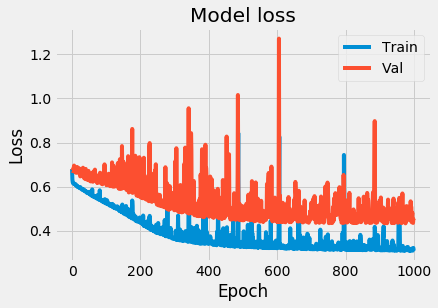

In [9]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

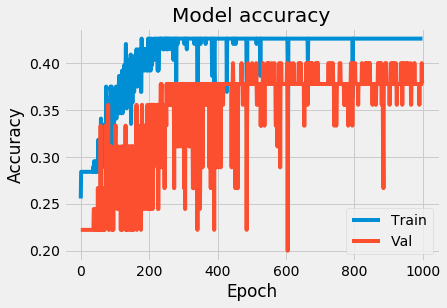

In [10]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [11]:
prediction = model.predict(test_x)

In [12]:
#Make a prediction & print the actual values
prediction  = [8 if y>=0.9 else
               7 if y>=0.8 and y<0.9 else
               6 if y>=0.7 and y<0.8 else
               5 if y>=0.6 and y<0.7 else
               4 if y>=0.5 and y<0.4 else
               3 if y>=0.4 and y<0.3 else
               2 if y>=0.3 and y<0.2 else
               1 if y>=0.1 else 0 for y in prediction] #Threshold
print(prediction)
print(test_y)

[8, 8, 1, 0, 6, 0, 6, 1, 8, 1, 8, 8, 8, 1, 8, 1, 1, 1, 1, 8, 8, 7, 1, 1, 1, 8, 6, 6, 8, 8, 8, 1, 7, 8, 8, 8, 7, 8, 5, 1, 1, 8, 1, 1, 8, 8, 7, 8, 7, 6, 5]
[[0.71428571]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.42857143]
 [1.        ]
 [0.28571429]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.85714286]
 [0.        ]
 [0.85714286]
 [0.14285714]
 [0.        ]
 [0.85714286]
 [0.85714286]
 [0.71428571]
 [0.85714286]
 [0.85714286]
 [0.85714286]
 [0.14285714]
 [0.71428571]
 [0.85714286]
 [1.        ]
 [0.71428571]
 [0.71428571]
 [0.71428571]
 [1.        ]
 [0.        ]
 [0.14285714]
 [1.        ]
 [0.28571429]
 [0.        ]
 [0.71428571]
 [0.71428571]
 [1.        ]
 [0.71428571]
 [1.        ]
 [0.14285714]
 [0.        ]]


In [13]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
new_pred = model.predict(train_x)
new_pred  = [8 if y>=0.9 else
             7 if y>=0.8 and y<0.9 else
             6 if y>=0.7 and y<0.8 else
             5 if y>=0.6 and y<0.7 else
             4 if y>=0.5 and y<0.4 else
             3 if y>=0.4 and y<0.3 else
             2 if y>=0.3 and y<0.2 else
             1 if y>=0.1 else 0 for y in new_pred] #Threshold
print(classification_report(new_train_y ,new_pred ))
print('Confusion Matrix: \n',confusion_matrix(new_train_y,new_pred))
print()
print('Accuracy: ', accuracy_score(new_train_y,new_pred))
print()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      0.21      0.25        34
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       0.90      0.35      0.51        54
           7       0.82      0.73      0.77        51
           8       0.82      0.93      0.87        60

    accuracy                           0.54       221
   macro avg       0.32      0.25      0.27       221
weighted avg       0.69      0.54      0.58       221

Confusion Matrix: 
 [[ 0  0  0  0  0  0  0  0  0]
 [27  7  0  0  0  0  0  0  0]
 [ 8  2  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  1  0]
 [ 0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28 19  4  3]
 [ 0  0  0  0  0  3  2 37  9]
 [ 0  1  0  0  0  0  0  3 56]]

Acc

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score, accuracy_score
test_pred = model.predict(test_x)
test_pred  = [8 if y>=0.9 else
             7 if y>=0.8 and y<0.9 else
             6 if y>=0.7 and y<0.8 else
             5 if y>=0.6 and y<0.7 else
             4 if y>=0.5 and y<0.4 else
             3 if y>=0.4 and y<0.3 else
             2 if y>=0.3 and y<0.2 else
             1 if y>=0.1 else 0 for y in test_pred] #Threshold
print(classification_report(new_test_y ,test_pred ))
print('Confusion Matrix: \n',confusion_matrix(new_test_y,test_pred))
print()
print('Accuracy: ', accuracy_score(new_test_y,test_pred))
print()
print ('precision score',precision_score(new_test_y,test_pred, average='macro'))
print()
print ('recall score',recall_score(new_test_y,test_pred,average='macro'))
print()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.56      0.64      0.60        14
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.20      0.11      0.14         9
           7       0.00      0.00      0.00         8
           8       0.43      0.69      0.53        13

    accuracy                           0.37        51
   macro avg       0.13      0.16      0.14        51
weighted avg       0.30      0.37      0.32        51

Confusion Matrix: 
 [[0 0 0 0 0 0 0 0 0]
 [2 9 0 0 0 1 1 1 0]
 [0 3 0 0 0 0 1 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 6]
 [0 1 0 0 0 0 1 0 6]
 [0 0 0 0 0 1 1 2 9]]

Accuracy:  0.37254901960784315

precision score 0.13234126984126984

recall score 0.

In [139]:
model.evaluate(test_x, test_y)[1]

58/58 [==============================] - 0s 292us/step


0.36206895112991333

In [1]:
## Analysis
#The model accurately identified people of surviving breastcancer or not with 36.2% accuracy on the test data !